# Classification Model: Diabetes Risk Prediction

This notebook builds a supervised learning model to predict diabetes risk.

**Purpose**: Develop a model that can identify individuals at risk of diabetes.

**Method**: Logistic Regression
- **Why Logistic Regression?**
  - Interpretable: Coefficients show which factors increase/decrease risk
  - Probabilistic: Provides risk scores, not just yes/no predictions
  - Standard: Widely used in medical risk prediction
  - Appropriate: Suitable for binary classification

- **Limitations**:
  - Assumes linear relationship between features and log-odds of diabetes
  - May not capture complex non-linear patterns
  - Performance depends on feature quality

**Note**: The goal is not to achieve the highest possible accuracy, but to apply the method correctly and understand its implications.

In [10]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from data_loader import load_diabetes_data
from preprocessing import prepare_features_target, scale_features
from classification import (
    train_logistic_regression,
    evaluate_model,
    plot_confusion_matrix,
    plot_roc_curve,
    get_feature_importance
)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load and Prepare Data

In [11]:
# Load data
df = load_diabetes_data()
X, y = prepare_features_target(df)

print(f"Total samples: {len(X)}")
print(f"Features: {X.shape[1]}")

Dataset loaded successfully from UCI repository
Shape: 253680 rows, 22 columns
Source: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
Features shape: (253680, 21)
Target distribution:
Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64
Class imbalance ratio: 6.18:1
Total samples: 253680
Features: 21


## 2. Train-Test Split

Using 80-20 split, which is standard practice.

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set: 202944 samples
Test set: 50736 samples

Training set class distribution:
Diabetes_binary
0    174667
1     28277
Name: count, dtype: int64

Test set class distribution:
Diabetes_binary
0    43667
1     7069
Name: count, dtype: int64


## 3. Feature Scaling

Scaling features for logistic regression.

**Why?** Helps with convergence and makes coefficients comparable.

In [13]:
# Scale features
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

print("Features scaled using StandardScaler")
print("Scaler fitted on training data only to avoid data leakage")

Features scaled using StandardScaler
Scaler fitted on training data only to avoid data leakage


## 4. Train Model

Training logistic regression with `class_weight='balanced'` to handle class imbalance.

In [14]:
# Train model
model = train_logistic_regression(X_train_scaled, y_train)

print("\nModel parameters:")
print(f"- Solver: lbfgs (default)")
print(f"- Max iterations: 1000")
print(f"- Class weight: balanced (to handle imbalance)")
print("\nNo hyperparameter tuning performed - using sensible defaults.")

Logistic Regression model trained successfully

Model parameters:
- Solver: lbfgs (default)
- Max iterations: 1000
- Class weight: balanced (to handle imbalance)

No hyperparameter tuning performed - using sensible defaults.


## 5. Evaluate Model

**Evaluation Focus**:
- **Precision**: Of those predicted to have diabetes, how many actually do?
- **Recall**: Of those who actually have diabetes, how many did we identify?

**Why this matters in healthcare**:
- Low recall means missing diabetic patients (serious)
- Low precision means false alarms (costly but less critical)

In [15]:
# Evaluate model
metrics, y_pred, y_pred_proba = evaluate_model(model, X_test_scaled, y_test)


=== Model Evaluation ===
Precision: 0.311
Recall: 0.761
F1-Score: 0.441
ROC-AUC: 0.820

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.95      0.73      0.82     43667
    Diabetes       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



## 6. Confusion Matrix

Understanding where the model makes mistakes.

✅ Figure saved: ../outputs/figures/confusion_matrix.png


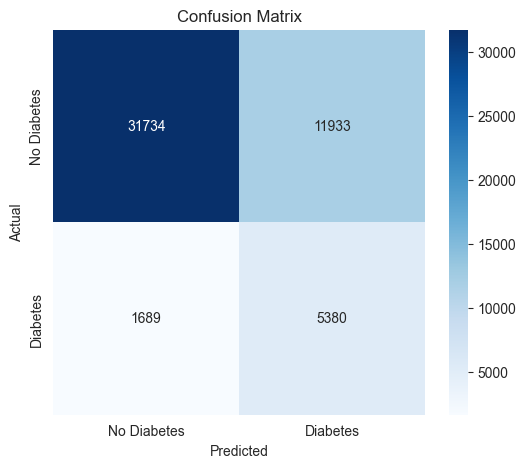

In [16]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, save_path='../outputs/figures/confusion_matrix.png')


## 7. ROC Curve

Visualizing the trade-off between true positive rate and false positive rate.

✅ Figure saved: ../outputs/figures/roc_curve.png


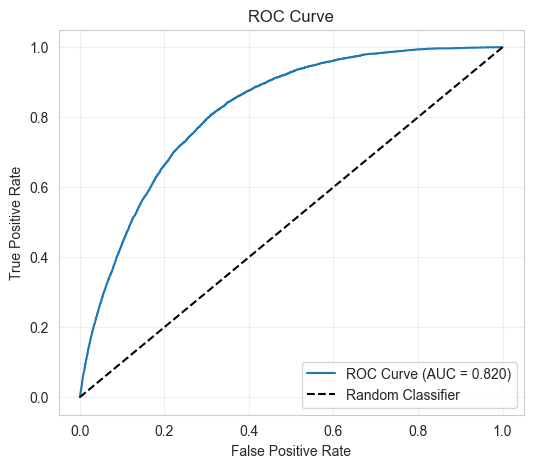

In [17]:
# Plot ROC curve
plot_roc_curve(y_test, y_pred_proba, save_path='../outputs/figures/roc_curve.png')


## 8. Feature Importance

Which health indicators are most predictive of diabetes?


Top 10 Most Important Features:
                 Feature  Coefficient  Abs_Coefficient
13               GenHlth     0.618830         0.618830
3                    BMI     0.490585         0.490585
18                   Age     0.457428         0.457428
0                 HighBP     0.364257         0.364257
1               HighChol     0.287265         0.287265
2              CholCheck     0.247702         0.247702
10     HvyAlcoholConsump    -0.172950         0.172950
17                   Sex     0.139168         0.139168
20                Income    -0.119336         0.119336
6   HeartDiseaseorAttack     0.073048         0.073048


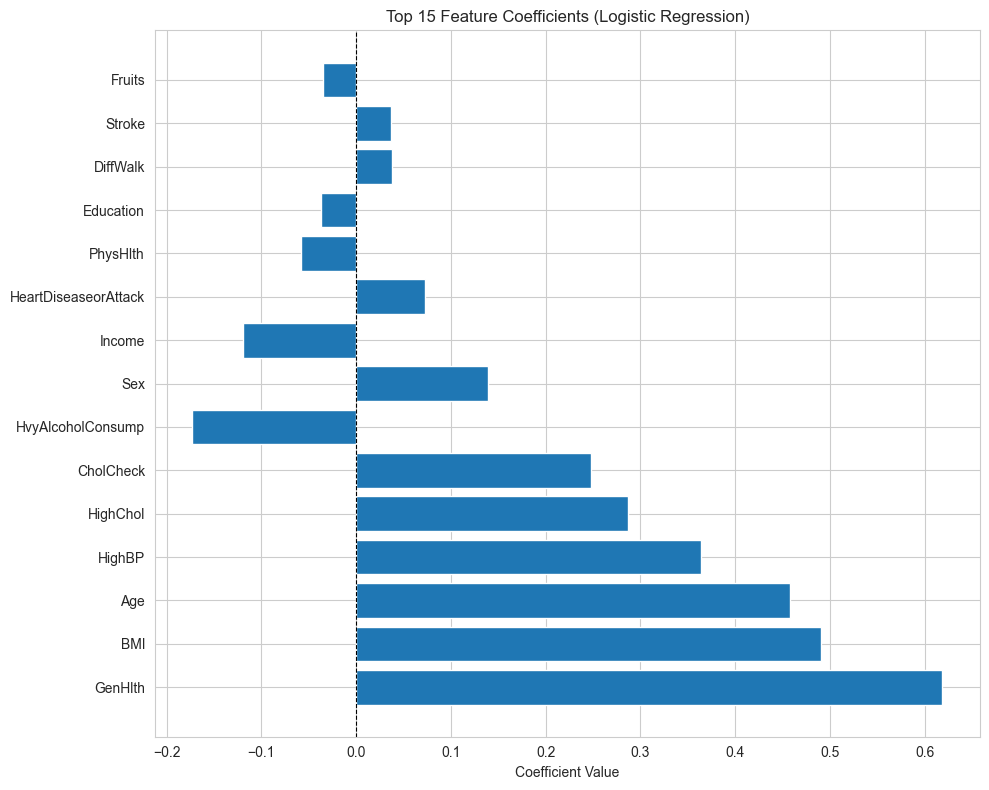


Interpretation:
- Positive coefficients increase diabetes risk
- Negative coefficients decrease diabetes risk
- Magnitude indicates strength of association


In [18]:
# Get feature importance
feature_importance = get_feature_importance(model, X_train.columns)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Coefficients (Logistic Regression)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('../outputs/figures/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInterpretation:")
print("- Positive coefficients increase diabetes risk")
print("- Negative coefficients decrease diabetes risk")
print("- Magnitude indicates strength of association")

## Summary and Reflection

### Model Performance

The logistic regression model shows reasonable performance for diabetes prediction:
- **Precision and Recall**: Balanced through `class_weight='balanced'`
- **ROC-AUC**: Indicates ability to distinguish between classes
- **Interpretability**: Coefficients show which factors matter most

### Key Findings

1. General health status, BMI, and age are strong predictors
2. The model handles class imbalance through weighting
3. Performance is moderate, not exceptional - which is realistic for self-reported health data

### Limitations and Assumptions

**Model Limitations**:
- Assumes linear relationship between features and log-odds of diabetes
- May not capture complex interactions between health factors
- Performance is constrained by data quality

**Data Limitations**:
- Self-reported health indicators may be inaccurate
- Survey respondents may not represent the full population
- Diabetes status is binary, but risk exists on a continuum
- No temporal information - we don't know when diabetes developed

### Practical Implications

**For Public Health**:
- The model could help identify high-risk populations for screening programs
- Feature importance aligns with known diabetes risk factors (validation)
- However, individual predictions should be interpreted cautiously

**For Clinical Use**:
- This model is NOT suitable for clinical diagnosis
- It could serve as a preliminary screening tool
- Clinical decisions require more comprehensive assessment

### Ethical Considerations

**Bias and Fairness**:
- Survey data may under-represent certain demographic groups
- Self-reported data may vary by education level and health literacy
- The model may perform differently across age, income, or education groups

**Deployment Risks**:
- False negatives (missed diabetics) could delay necessary care
- False positives could cause unnecessary anxiety and testing
- Risk scores should not replace professional medical judgment

**Transparency**:
- Logistic regression's interpretability is an advantage for accountability
- Patients and providers can understand which factors drive predictions
- However, the model's limitations must be clearly communicated

### Comparison with Alternative Approaches

**Why not Random Forest or Neural Networks?**
- Would likely achieve higher accuracy
- But would sacrifice interpretability
- In healthcare, understanding *why* a prediction was made is often as important as the prediction itself

**Why not extensive hyperparameter tuning?**
- Could marginally improve performance
- But risks overfitting to this specific dataset
- The goal is to demonstrate understanding, not optimization

### Conclusion

This analysis demonstrates:
1. Correct application of logistic regression for binary classification
2. Appropriate handling of class imbalance
3. Thoughtful evaluation using healthcare-relevant metrics
4. Awareness of limitations and ethical implications

The model is a reasonable starting point for population-level diabetes risk assessment, but should be used with caution and in conjunction with clinical expertise.